# Stacked Bar Charts With Labels in Matplotlib

Stacked bar charts are a very efficient way of displaying data.  Much more efficient in terms of use of space than pie charts for example (you only need one stacked bar to display the same information that a pie-chart displays).  Also, because the human eye can compare linear distances much better than curve lengths, they are much more effective for comparing different quantities to each other.

Stacked bar charts are useful when you have multiple series of data of the same type (i.e. same units) and where each series can be considered to be a proportion of the whole quantity.  For example, to see the expenses of each person in a team over 12 months.  That total height of the stacked bars is the total expenses.

Unfortunately, stacked bar charts aren't that easy to produce in matplotlib (you have to specify the position of the bottom and top of each bar segment) and there is no built-in method to add value labels to each bar.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.__version__

'3.7.2'

### Simple horizontal stacked one-bar chart

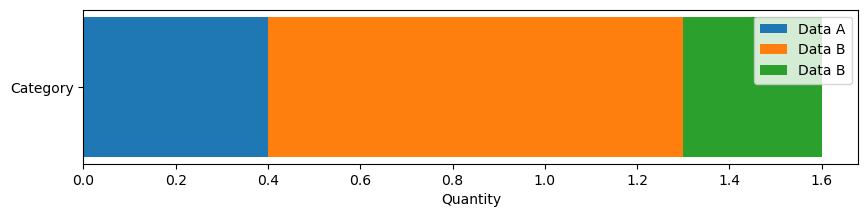

In [2]:
plt.figure(figsize=(10, 2))

ind = range(1)
labels = ['Data A', 'Data B', 'Data C']
data = [0.4, 0.9, 0.3]

p1 = plt.barh(ind, data[0], label=labels[0])
p2 = plt.barh(ind, data[1], left=data[0], label=labels[1])
p3 = plt.barh(ind, data[2], left=data[0]+data[1], label=labels[1])

plt.yticks(ind, ['Category'])
plt.xlabel('Quantity')
plt.legend()

plt.savefig('bar1.png')
plt.show()

This is a good alternative to a pie-chart as it takes up less space.  However, as you can see above, it's a lot of code for such a simple plot.

## Pandas is a good solution

It has to be said.  [Pandas](http://pandas.pydata.org/pandas-docs/stable/) is probably the easiest way to make a stacked bar chart.  But as yet there is no easy way to add value labels to the bar segments.

In [3]:
import pandas as pd

pd.__version__

'2.0.3'

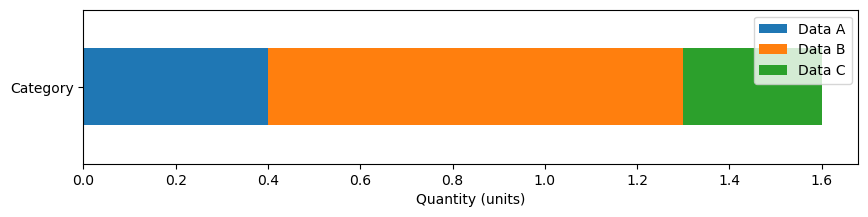

In [4]:
data = {
    'Data A': [0.4], 
    'Data B': [0.9], 
    'Data C': [0.3]
}

index = pd.Index(['Category'])

df = pd.DataFrame(data, index=index)

ax = df.plot(kind='barh', stacked=True, figsize=(10, 2))
ax.set_xlabel("Quantity (units)")

plt.show()

### Vertical stacked bar chart

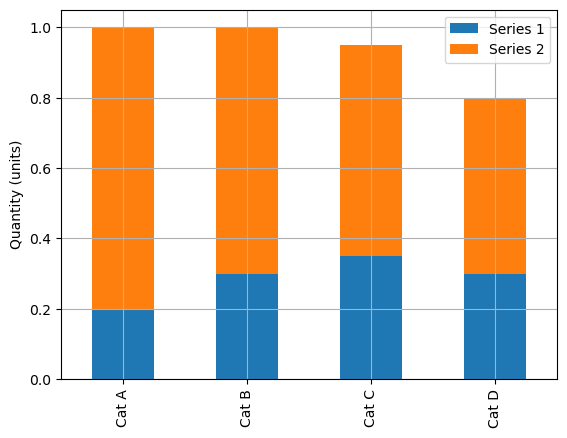

In [5]:
data = {
    'Series 1': [0.2, 0.3, 0.35, 0.3],
    'Series 2': [0.8, 0.7, 0.6, 0.5]
}

index = pd.Index(['Cat A', 'Cat B', 'Cat C', 'Cat D'])

df = pd.DataFrame(data, index=index)

ax = df.plot(kind='bar', stacked=True)
ax.set_ylabel("Quantity (units)")
plt.grid()

plt.show()

### Functions for making horizontal and vertical stacked bar charts with value labels without using Pandas

In [6]:
def plot_stacked_barh(data, series_labels, category_labels=None, 
                 show_values=False, value_format="{}", x_label=None, 
                 colors=None, grid=True, reverse=False):
    """Plots a stacked horizontal bar chart with the data and labels
    provided.
    
    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list
                       containing data for each series in rows
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the y-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    x_label         -- Label for x-axis (str)
    colors          -- List of color labels
    grid            -- If True display grid
    reverse         -- If True reverse the order that the
                       series are displayed (top-to-bottom
                       or bottom-to-top)
    """

    nx = len(data[0])
    ind = list(range(nx))

    cum_size = np.zeros(nx)
    
    data = np.array(data)
    
    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)
    
    for i, row_data in enumerate(data):
        color = colors[i] if colors is not None else None
        p = plt.barh(ind, row_data, left=cum_size, 
                     label=series_labels[i], color=color)
        cum_size += row_data
        if show_values:
            plt.bar_label(p, label_type='center', fmt=value_format)

    if category_labels:
        plt.yticks(ind, category_labels)

    if x_label:
        plt.xlabel(x_label)
    
    plt.legend()
    
    if grid:
        plt.grid()


def plot_stacked_bar(data, series_labels, category_labels=None, 
                     show_values=False, value_format="{}", y_label=None, 
                     colors=None, grid=True, reverse=False):
    """Plots a stacked bar chart with the data and labels provided.

    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list
                       containing data for each series in rows
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the x-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    y_label         -- Label for y-axis (str)
    colors          -- List of color labels
    grid            -- If True display grid
    reverse         -- If True reverse the order that the
                       series are displayed (left-to-right
                       or right-to-left)
    """

    ny = len(data[0])
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)

    for i, row_data in enumerate(data):
        color = colors[i] if colors is not None else None
        p = plt.bar(ind, row_data, bottom=cum_size, 
                    label=series_labels[i], color=color)
        cum_size += row_data
        if show_values:
            plt.bar_label(p, label_type='center', fmt=value_format)

    if category_labels:
        plt.xticks(ind, category_labels)

    if y_label:
        plt.ylabel(y_label)

    plt.legend()

    if grid:
        plt.grid()


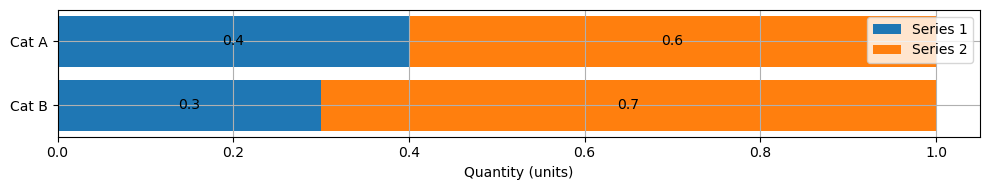

In [7]:
plt.figure(figsize=(10, 2))

series_labels = ['Series 1', 'Series 2']

data = [
    [0.4, 0.3],
    [0.6, 0.7]
]

category_labels = ['Cat A', 'Cat B']

plot_stacked_barh(
    data, 
    series_labels, 
    category_labels=category_labels, 
    show_values=True, 
    value_format="{:.1f}",
    x_label="Quantity (units)",
    reverse=True
)

plt.tight_layout()
plt.savefig('bar2.png')
plt.show()

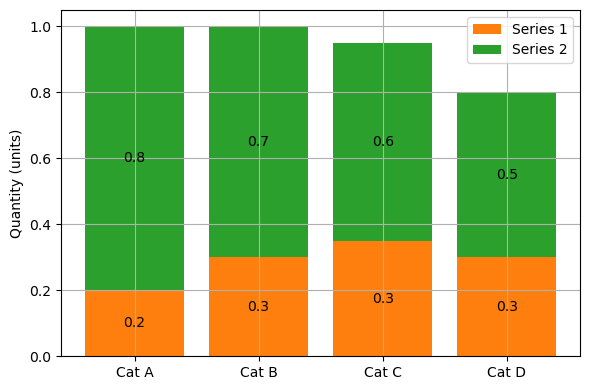

In [8]:
plt.figure(figsize=(6, 4))

series_labels = ['Series 1', 'Series 2']

data = [
    [0.2, 0.3, 0.35, 0.3],
    [0.8, 0.7, 0.6, 0.5]
]

category_labels = ['Cat A', 'Cat B', 'Cat C', 'Cat D']

plot_stacked_bar(
    data, 
    series_labels, 
    category_labels=category_labels, 
    show_values=True, 
    value_format="{:.1f}",
    colors=['tab:orange', 'tab:green'],
    y_label="Quantity (units)"
)

plt.tight_layout()
plt.savefig('bar3.png')
plt.show()

# Same in Seaborn

Seaborn is a nice tool for making plots in different styles with more subtle colours.

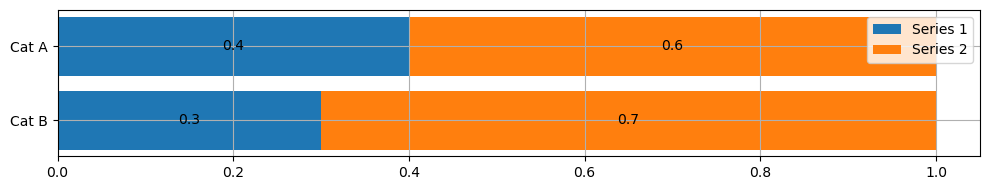

In [9]:
import seaborn as sns

plt.figure(figsize=(10, 2))

data = [
    [0.4, 0.3],
    [0.6, 0.7]
]

plot_stacked_barh(
    data, 
    series_labels=['Series 1', 'Series 2'], 
    category_labels=['Cat A', 'Cat B'], 
    show_values=True, 
    value_format="{:.1f}",
    reverse=True
)

plt.legend(frameon=True) # turned off by default in Seaborn

plt.tight_layout()
plt.savefig('bar4.png')
plt.show()